<a href="https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/Neuronas_Lineales_Adpatativas_(AdaLiNe)_con_Gradiente_Estocastico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradiente Descendiente Estocastico SGD
A diferencia del gradiente descendiente por lotes presentado en [gradiente por lotes](https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/Neuron_Artificial_Adaline.ipynb) el cual actualiza los pesos con base en la suma de los errores de todas las muestras ade entrenamiento creando la desventaja de que si se obtienen nuevos datos de entrenamiento el modelo tendra que ajustar los pesos con todo el conjunto de datos lo que lo hace computacionalmente muy costoso , el gradeinte descendiente estocastico actualiza los pesos de manera incremental para cada muestra de entrenamiento.

$\Delta W = \eta (y^{i}-\phi(z^{i}))X_{j}^{i}$

##Ventajas del gradeinte descendiente estocastico



1.   Rapida convergencia debido a actualizaciones de peso mas frequentes
2.   Puede ser utilizado en aprendizaje online, debido a que en el aprendizaje online el modelo se  ajusta al mismo tiempo que van llegando datos nuevos de entrenamiento, lo que garantiza espacio en memoria, ya que a medida que actualiza el modelo estos datos se pueden ir descartando. 


**Nota**: para evitar ciclos es recomendable presentar a la red el conjunto de entrenamiento de forma aleatoria y en cada iteración mezclar los datos de entrenamiento


# Implementación del GDS en la estructura AdaLiNe

In [0]:
import numpy as np
class AdalineSGD(object):
  def __init__(self,tasa_aprendizaje=0.01,numero_iteraciones=50,mezcla=True,semilla=1):
    self.tasa_aprendizaje=tasa_aprendizaje
    self.numero_iteraciones=numero_iteraciones
    self.mezcla=mezcla
    self.semilla=semilla
    self.pesos_iniciados=False

  def alg_aprendizaje(self,X,y):
    self._inicializar_pesos(X.shape[1])
    self.coste=[]
    for i in range(self.numero_iteraciones):
      if self.mezcla:
        X,y = self._mezclar(X,y)
      cost=[]
      for xi, target in zip(X,y):
        cost.append(self._actualizar_pesos(xi,target))
      media_cost=sum(cost)/len(y)
      self.coste.append(media_cost)
    return self

  def alg_aprendizaje_parcial(self,X,y):
    #aprendizaje de datos de entrnamiento si reinicializacion de pesos para modo online
    if not pesos_inicializados:
      self._inicializar_pesos(X.shape[1])
    if y.reval().shape[0]>1:
      for xi,target in zip(X,y):
        self._actualizar_pesos(xi,target)
    else:
      self.actualizar_pesos(X,y)
    return self

  def _inicializar_pesos(self,dim):
    self.aleatorio = np.random.RandomState(self.semilla)
    self.pesos= self.aleatorio.normal(loc=0.0,scale=0.01,size=dim+1)
    self.pesos_iniciados = True
    
  def _mezclar(self,X,y):
    # funcion que mezcla los datos de entrenamiento para evitar ciclos
    indice_mezclados = self.aleatorio.permutation(len(y))
    return X[indice_mezclados], y[indice_mezclados]

  def _actualizar_pesos(self,xi,target):
    # se aplica la regla de aprendizaje Adaline para actualizacion de pesos
    entrada = self._entrada_red(xi)
    salida = self._activacion(entrada)
    error = (target-salida)
    self.pesos[1:]+=self.tasa_aprendizaje*xi.dot(error)
    self.pesos[0]+=self.tasa_aprendizaje*error # sin la sumatoria 
    cost=0.5*error**2
    return cost

  def _entrada_red(self,xi):
    #calcular la entrada de la red
    return np.dot(xi,self.pesos[1:])+self.pesos[0]

  def _activacion(self,X):
    # como es una funcion identidad retorna el mismo valor
    return X

  def prediccion(self,X):
    return np.where(self._activacion(self._entrada_red(X))>=0.0,1,-1)

#Cargando y normalizando datos de entrenamiento IRIS

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets 

iris = datasets.load_iris() #imortamos el dataset Iris
iris_df=pd.DataFrame(iris.data)  # lo convertimos a un dataframe con pandas
iris_df['class']=iris['target'] # creamos la columna que define las clases de cada flor
iris_df['class']=iris_df['class'].apply(lambda x: iris['target_names'][x])
iris_df.tail()  # mostramos los ultimos registros para ver si todo esta correcto

#se seleccionan dos clases de flores del conjunto Iris las setosas y las versicolor y las clasificaremos como -1 y 1 respectivamente
y=iris_df.iloc[0:100,4]
y=np.where( y == 'setosa',-1,1)

# seleccionamos las caracteristicas de longitud de sepalo y longitud de petalo correspondientes a las columnas 0 y 2 del dataframes Iris
X = iris_df.iloc[0:100,[0,2]].values     # se usa values para retornar un array

#normalización del dataset
x_nor =np.copy(X)
x_nor[:,0] = (x_nor[:,0] - x_nor[:,0].mean()) /x_nor[:,0].std()
x_nor[:,1] = (x_nor[:,1] - x_nor[:,1].mean()) /x_nor[:,1].std()

Entrenamiento del modelo Adaline con gradiente estocastico

In [16]:
adaSGD = AdalineSGD(tasa_aprendizaje=0.01,numero_iteraciones=15)
adaSGD.alg_aprendizaje(x_nor,y)
for i in adaSGD.coste:
  print("la suma de errores cuadraticos o funcion de coste es {}".format(i))

la suma de errores cuadraticos o funcion de coste es 0.2039184422695396
la suma de errores cuadraticos o funcion de coste es 0.07359149111267219
la suma de errores cuadraticos o funcion de coste es 0.055929738151085144
la suma de errores cuadraticos o funcion de coste es 0.04612810956754943
la suma de errores cuadraticos o funcion de coste es 0.03934742569854211
la suma de errores cuadraticos o funcion de coste es 0.03474062343316374
la suma de errores cuadraticos o funcion de coste es 0.03161702168841462
la suma de errores cuadraticos o funcion de coste es 0.029568192579289002
la suma de errores cuadraticos o funcion de coste es 0.028072765598128525
la suma de errores cuadraticos o funcion de coste es 0.02702343103668937
la suma de errores cuadraticos o funcion de coste es 0.02629291748109251
la suma de errores cuadraticos o funcion de coste es 0.02586126622169623
la suma de errores cuadraticos o funcion de coste es 0.02563839791027128
la suma de errores cuadraticos o funcion de coste

#Grafico de Disperción (Reginoes de decisión) y Función de coste

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def diagrama_Regiones(X,y, clasificador, resolucion=0.02):
  #definicion de mapa de colores
  marcadores=('s','x','o','^','v')
  colores = ('red','blue','lightgreen','gray','cyan')
  cmap= ListedColormap(colores[:len(np.unique(y))])

  # superficie de decisión
  x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1
  x2_min, x2_max = X[:,0].min() -1, X[:,0].max() +1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolucion),
                        np.arange(x2_min,x2_max,resolucion))
  Z = clasificador.prediccion(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha=0.3,cmpa=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  #representacion de las clases
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y ==cl, 0],
                y=X[y == cl,1],
                alpha=0.8,
                c=colores[idx],
                marker = marcadores[idx],
                label=cl,
                edgecolor='black')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'cmpa'


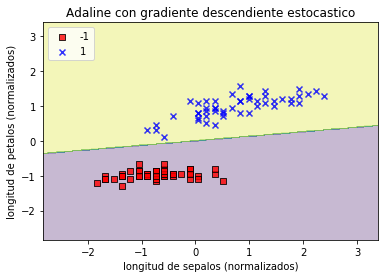

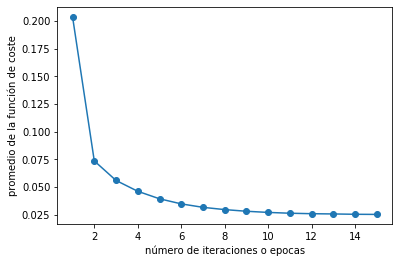

In [21]:
diagrama_Regiones(x_nor,y,clasificador=adaSGD)
plt.title('Adaline con gradiente descendiente estocastico')
plt.xlabel('longitud de sepalos (normalizados)')
plt.ylabel('longitud de petalos (normalizados)')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1,len(adaSGD.coste)+1),adaSGD.coste,marker='o')
plt.xlabel('número de iteraciones o epocas')
plt.ylabel('promedio de la función de coste')
plt.show()


como se puede observar el algoritmo converge mucho mas rapido que el gradiente por lotes, despues de 6 iteraciones ya se empieza a normalizar llegando al limite de decisión final.

**Nota** para usar el algoritmo de aprendizaje en modo online es solo ingresar las nuevas muestras de ntrenamiento del algoritmo esto es:

*adaSGD = alg_aprendizaje_parcial(x_norm[0,:],y[0]* 